In [1]:
!pip install tensorflow-gpu==2.0.0-beta1
!pip install 'tensorflow-hub == 0.5'


     |████████████████████████████████| 348.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 30.9MB/s 
     |████████████████████████████████| 501kB 40.9MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers




In [0]:
zip_file = tf.keras.utils.get_file(origin='https://storage.googleapis.com/plantdata/PlantVillage.zip', 
                                   fname='PlantVillage.zip', extract=True)


In [0]:
data_dir = os.path.join(os.path.dirname(zip_file), 'PlantVillage')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')


In [0]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [7]:
print(' training :', count(train_dir))
print('validation :', count(validation_dir))


 training : /root/.keras/datasets/PlantVillage/train : 43444files
validation : /root/.keras/datasets/PlantVillage/validation : 10861files


In [0]:
!!wget https://github.com/obeshor/Plant-Diseases-Detector/archive/master.zip
!unzip master.zip;

In [13]:
import json

with open('Plant-Diseases-Detector-master/categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
print ('classes are')  
print (classes)

classes are
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato

In [15]:
print('Number of classes:',len(classes))

Number of classes: 38


In [0]:


IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

In [0]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)
do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)


In [0]:

model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


In [0]:
LEARNING_RATE = 0.0001 #@param {type:"number"}
model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])



In [26]:

EPOCHS=5 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/5
678/678 [==============================] - 610s 900ms/step - loss: 0.2103 - accuracy: 0.9307 - val_loss: 0.1355 - val_accuracy: 0.9555
Epoch 2/5
678/678 [==============================] - 608s 896ms/step - loss: 0.2147 - accuracy: 0.9275 - val_loss: 0.1316 - val_accuracy: 0.9582
Epoch 3/5
678/678 [==============================] - 610s 900ms/step - loss: 0.2099 - accuracy: 0.9308 - val_loss: 0.1396 - val_accuracy: 0.9557
Epoch 4/5
678/678 [==============================] - 609s 898ms/step - loss: 0.2063 - accuracy: 0.9290 - val_loss: 0.1326 - val_accuracy: 0.9567
Epoch 5/5
678/678 [==============================] - 609s 898ms/step - loss: 0.2058 - accuracy: 0.9314 - val_loss: 0.1344 - val_accuracy: 0.9564


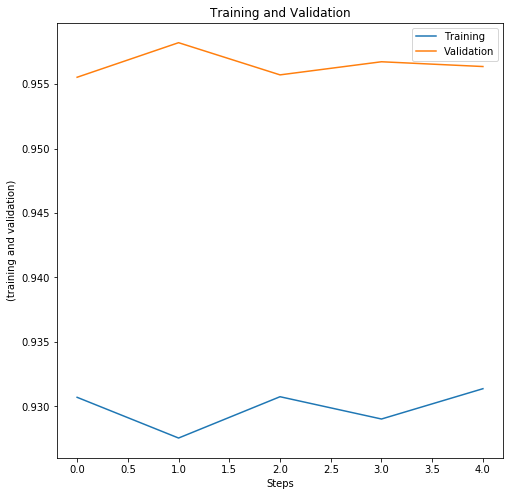

In [35]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='upper right')
plt.title('Training and Validation') 
plt.ylabel("(training and validation)")
plt.xlabel("Steps")

plt.show()

In [0]:

import cv2
import itertools
import random
from collections import Counter
from glob import iglob
def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
    img = img /255
        return img
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

Source class: Tomato___Late_blight, obtained from Tomato___Late_blight/a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653.JPG


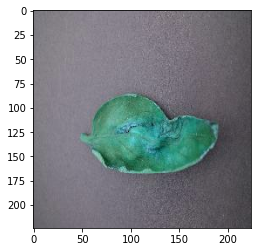

<Figure size 432x288 with 0 Axes>

estimated output Tomato___Late_blight, accuracy of outcome 0.988307
Source class: Orange___Haunglongbing_(Citrus_greening), obtained from Orange___Haunglongbing_(Citrus_greening)/7144df40-6459-4098-ae71-e6d57407ef3b___CREC_HLB 7887.JPG


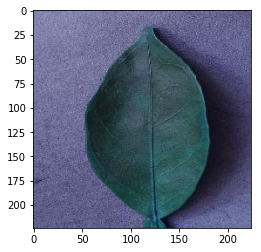

estimated output Orange___Haunglongbing_(Citrus_greening), accuracy of outcome 1.000000
Source class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, obtained from Tomato___Tomato_Yellow_Leaf_Curl_Virus/0e1fda76-d958-490f-9fcb-21e86c99dbe6___UF.GRC_YLCV_Lab 02200.JPG


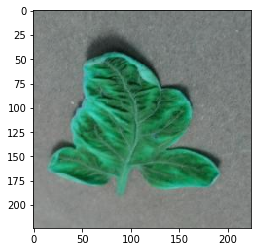

<Figure size 432x288 with 0 Axes>

estimated output Tomato___Tomato_Yellow_Leaf_Curl_Virus, accuracy of outcome 0.999999
Source class: Tomato___Target_Spot, obtained from Tomato___Target_Spot/627ccb34-558c-4e7d-81de-8fa8fd3f7549___Com.G_TgS_FL 8198.JPG


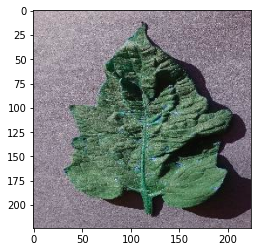

<Figure size 432x288 with 0 Axes>

estimated output Tomato___Target_Spot, accuracy of outcome 0.892530
Source class: Corn_(maize)___Common_rust_, obtained from Corn_(maize)___Common_rust_/RS_Rust 1650.JPG


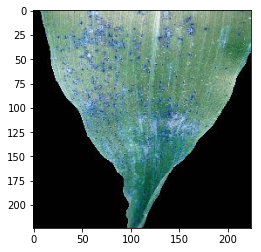

<Figure size 432x288 with 0 Axes>

estimated output Corn_(maize)___Common_rust_, accuracy of outcome 0.999999


In [34]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("Source class: %s, obtained from %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
   
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()
    print("estimated output %s, accuracy of outcome %f" % (list(prediction.keys())[0], list(prediction.values())[0]))